# Diabetes 130-US hospitals for years 1999-2008

Dataset consists of hospital admissions of length between one and 14 days that did not result in a patient death or discharge to a hospice. Each encounter corresponds to a unique patient diagnosed with diabetes, although the primary diagnosis may be different. During each of the analyzed encounters, lab tests were ordered and medication was administered.
Since we are primarily interested in factors that lead to early readmission, we defined the readmission attribute (outcome) as having two values: “readmitted,” if the patient was readmitted within 30 days of discharge or “otherwise,” which covers both readmission after 30 days and no readmission at all.

#### **Data Set Description**
* ***Encounter ID***: Unique identifier of an encounter
* ***Patient number***: Unique identifier of a patient
* ***Race Values***: Caucasian, Asian, African American, Hispanic, and other
* ***Gender Values***: male, female, and unknown/invalid
* ***Age***: Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
* ***Weight***: Weight in pounds
* ***Admission type***: Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* ***Discharge disposition***: Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* ***Admission source***: Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* ***Time in hospital***: Integer number of days between admission and discharge
* ***Payer code***: Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
* ***Medical specialty***: Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* ***Number of lab procedures***: Number of lab tests performed during the encounter
* ***Number of procedures***: Numeric Number of procedures (other than lab tests) performed during the encounter
* ***Number of medications***: Number of distinct generic names administered during the encounter
* ***Number of outpatient visits***: Number of outpatient visits of the patient in the year preceding the encounter
* ***Number of emergency visits***: Number of emergency visits of the patient in the year preceding the encounter
* ***Number of inpatient visits***: Number of inpatient visits of the patient in the year preceding the encounter
* ***Diagnosis 1***: The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* ***Diagnosis 2***: Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* ***Diagnosis 3***: Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* ***Number of diagnoses***: Number of diagnoses entered to the system 0%
* ***Glucose serum test***: result Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* ***A1c test result***: Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
Change of medications Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
* ***Diabetes medications***: Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
* 24 features for medications For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* ***Readmitted***: Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetic_data.csv', keep_default_na=' ')
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
df.shape

(101766, 50)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

## Missing Values

In [5]:
def get_missing_values(dataframe):
  '''creates a table with the feature, the total of missing value for the feature, and the percentage'''
  df = dataframe
  missing_values = pd.DataFrame(index=None, columns= ['feature','quantity','percentage'])
  for column in df.columns:
    if df[column].dtype == object:
      quantity = df[df[column]=='?'][column].count()
      percentage = quantity/df[column].count()
      missing_values = missing_values.append({"feature" : column,
                                              "quantity" : quantity,
                                              "percentage": percentage
                                              },ignore_index=True)
  return missing_values

In [6]:
missing_values = get_missing_values(df)
missing_values

,feature,quantity,percentage
0,race,2273,0.022336
1,gender,0,0.000000
2,age,0,0.000000
3,weight,98569,0.968585
4,payer_code,40256,0.395574
5,medical_specialty,49949,0.490822
6,diag_1,21,0.000206
7,diag_2,358,0.003518
8,diag_3,1423,0.013983
9,max_glu_serum,0,0.000000


In [7]:
df.gender.unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [8]:
print('gender',df[df['gender']=='Unknown/Invalid']['gender'].count())

gender 3


Drop variables with more than 39% of missing values

In [9]:
null_features = missing_values[missing_values['percentage']>= 0.39]['feature']
null_features

3               weight
4           payer_code
5    medical_specialty
Name: feature, dtype: object

In [10]:
for feature in null_features:
  df = df.drop(feature,axis=1)

Now we are going to drop rows with "?" in any column

In [11]:
index_to_drop = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)
index_to_drop = index_to_drop.union(set(df['diag_1'][df['diag_1'] == '?'].index))
index_to_drop = index_to_drop.union(set(df['diag_2'][df['diag_2'] == '?'].index))
index_to_drop = index_to_drop.union(set(df['diag_3'][df['diag_3'] == '?'].index))
index_to_drop = index_to_drop.union(set(df['race'][df['race'] == '?'].index))
index_to_drop = index_to_drop.union(set(df[df['discharge_disposition_id'] == 11].index))#this corresponds to
index_to_drop = index_to_drop.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
new_index = list(set(df.index) - set(index_to_drop))
df = df.iloc[new_index]

In [12]:
df.shape

(96446, 47)

we are also going to delete this 2 features that has the same value in all rows

In [13]:
df['citoglipton'].append(df['examide']).unique()

array(['No'], dtype=object)

In [14]:
df = df.drop(['citoglipton','examide'], axis = 1)

In [15]:
df.shape

(96446, 45)

## Exploratory Data Analysis

#### Readmitted

In [16]:
df['readmitted'].value_counts()

NO     50731
>30    34649
<30    11066
Name: readmitted, dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

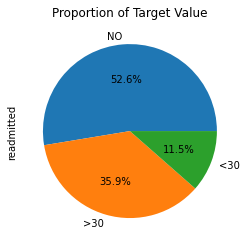

In [18]:
df.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

#### Race

In [19]:
df.race.value_counts()

Caucasian          73835
AfricanAmerican    18560
Hispanic            1971
Other               1463
Asian                617
Name: race, dtype: int64

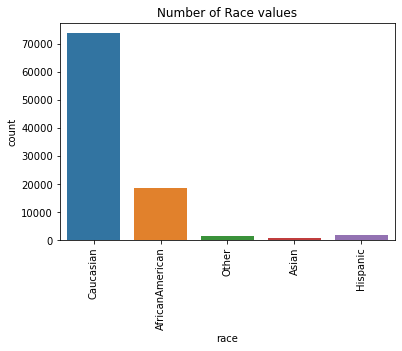

Proportion of Race
Caucasian          76.555793
AfricanAmerican    19.243929
Hispanic            2.043631
Other               1.516911
Asian               0.639736
Name: race, dtype: float64


In [20]:
sns.countplot(x=df.race, data = df)
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race")
print(df.race.value_counts(normalize = True)*100)

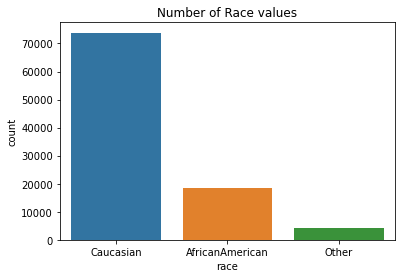

Proportion of Race After the Mapping
Caucasian          76.555793
AfricanAmerican    19.243929
Other               4.200278
Name: race, dtype: float64


In [21]:
mapped_race = {"Asian":"Other","Hispanic":"Other"}
#df.race = df.race.replace(mapped_race)

sns.countplot(x=df.race.replace(mapped_race), data = df)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race After the Mapping")
print(df.race.replace(mapped_race).value_counts(normalize= True)*100)

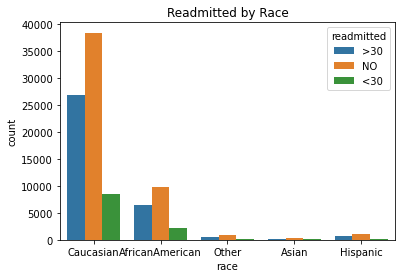

In [22]:
sns.countplot(x="race", hue= "readmitted", data = df)
plt.title("Readmitted by Race")
plt.show()

In [23]:
# sns.catplot(x = "race", y = "readmitted", data = df, kind = "bar", height= 5)
# plt.title("Readmitted Probability")
# plt.show()

<AxesSubplot:xlabel='count', ylabel='race'>

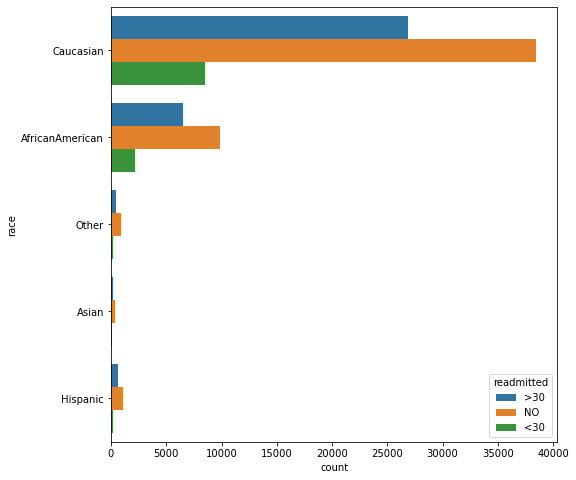

In [24]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['race'], hue = df['readmitted'])

#### Gender

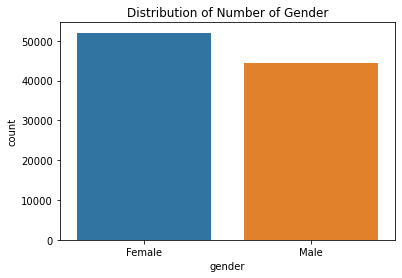

Proportions of gender
Female    0.539224
Male      0.460776
Name: gender, dtype: float64


In [25]:
sns.countplot(x = "gender", data = df)
plt.title("Distribution of Number of Gender")
plt.show()

print("Proportions of gender")
print(df.gender.value_counts(normalize = True))

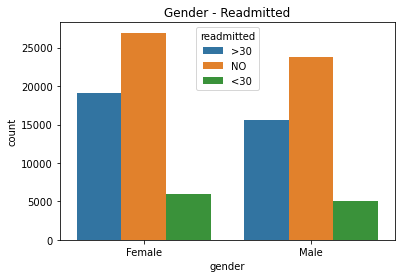

In [26]:
sns.countplot(x = "gender", hue = "readmitted", data = df)
plt.title("Gender - Readmitted")
plt.show()

#### Age

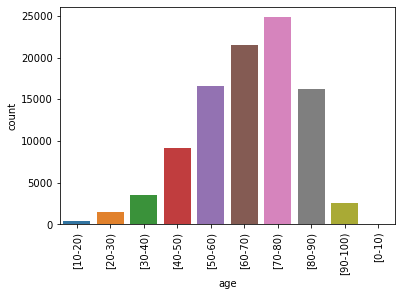

In [27]:
sns.countplot(x="age", data = df)
plt.xticks(rotation = 90)
plt.show()

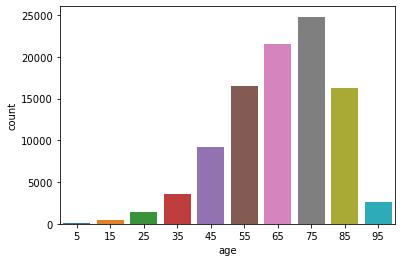

In [28]:
df.age = df.age.replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

sns.countplot(x="age", data = df)
#plt.xticks(rotation = 90)
plt.show()

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

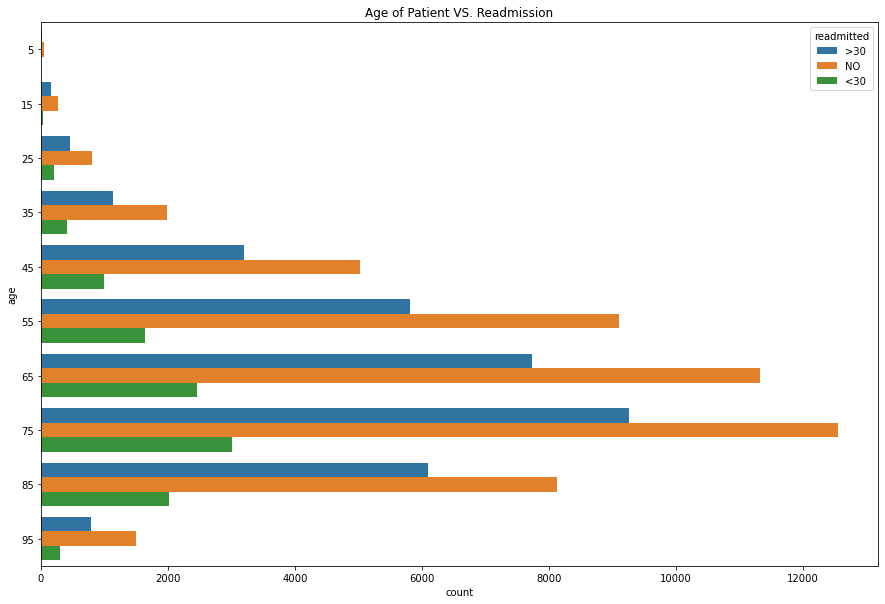

In [29]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

#### Admission Type ID


* Emergency : 1
* Urgent : 2
* Elective : 3
* Newborn : 4
* Not Available : 5
* NULL : 6
* Trauma Center : 7
* Not Mapped : 8

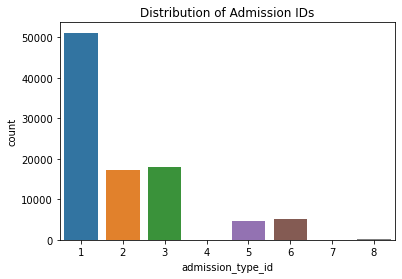

Distribution of Admission IDs
1    51097
3    18070
2    17300
6     5072
5     4568
8      312
7       17
4       10
Name: admission_type_id, dtype: int64


In [30]:
sns.countplot(x = "admission_type_id", data = df)
plt.title("Distribution of Admission IDs")
plt.show()

print("Distribution of Admission IDs")
print(df.admission_type_id.value_counts())

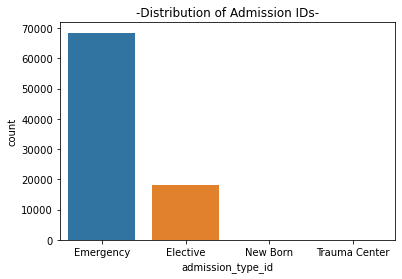

-Distribution of ID's-
Emergency        68397
Elective         18070
Trauma Center       17
New Born            10
Name: admission_type_id, dtype: int64


In [31]:
mapped = {1.0:"Emergency",
          2.0:"Emergency",
          3.0:"Elective",
          4.0:"New Born",
          5.0:np.nan,
          6.0:np.nan,
          7.0:"Trauma Center",
          8.0:np.nan}

sns.countplot(x = df.admission_type_id.replace(mapped), data = df)
plt.title("-Distribution of Admission IDs-")
plt.show()

print("-Distribution of ID's-")
print(df.admission_type_id.replace(mapped).value_counts())

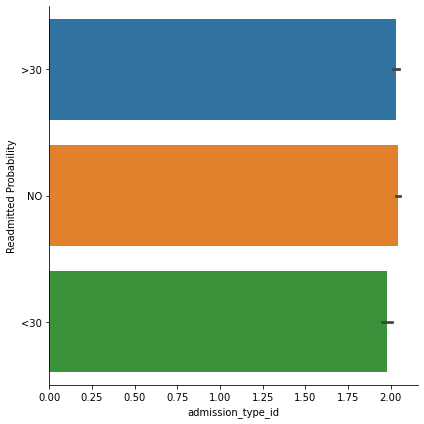

In [32]:
g = sns.catplot(x = "admission_type_id", y ="readmitted", 
                    data = df, height = 6, kind = "bar")
g.set_ylabels("Readmitted Probability")
plt.show()

#### Discharge Disposition ID

-Integer identifier corresponding to 29 distinct values. For example, discharged to home, expired, and not available

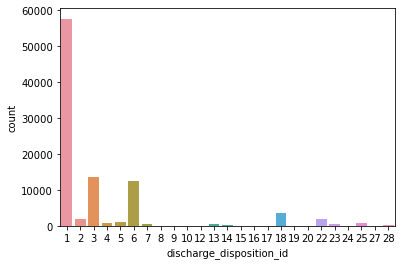

In [33]:
sns.countplot(x ="discharge_disposition_id", data = df)
plt.show()

#### Admission Source ID

Integer identifier corresponding to 21 distinct values.For example, physician referral, emergency room, and transfer from a hospital

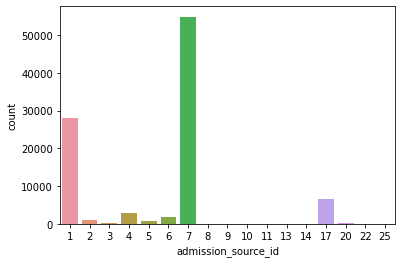

In [34]:
sns.countplot(df["admission_source_id"])
plt.show()

* we'll put the similar ones together like Referral or Transfer
* we will replace Null, Not Mapped, Unknown values as NAN

Readmitted Probability of Referral is very close to Emergency, although Emergency is have more samples than other

#### Number of Lab Procedures

Number of lab tests performed during the encounter

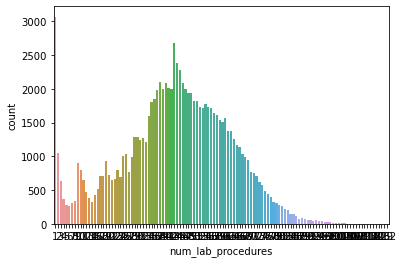

Proportions of Column
1     3069
43    2686
44    2385
45    2277
38    2109
40    2095
46    2089
41    2021
42    2005
47    1999
Name: num_lab_procedures, dtype: int64


In [35]:
sns.countplot(x = "num_lab_procedures", data = df)
plt.show()

print("Proportions of Column")
print(df.num_lab_procedures.value_counts().head(10))

#### Time in Hospital VS. Readmission

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

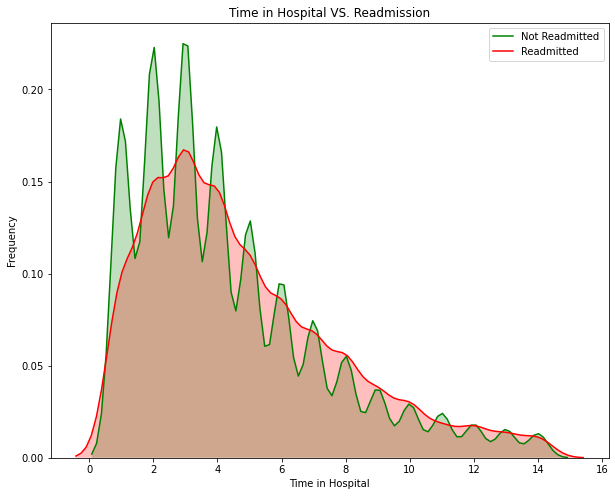

In [36]:
fig = plt.figure(figsize=(10,8),)
ax=sns.kdeplot(df.loc[(df['readmitted'] != '<30'),'time_in_hospital'] , color='g',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == '<30'),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

Most of patients stayed 2 - 3 days in hospital

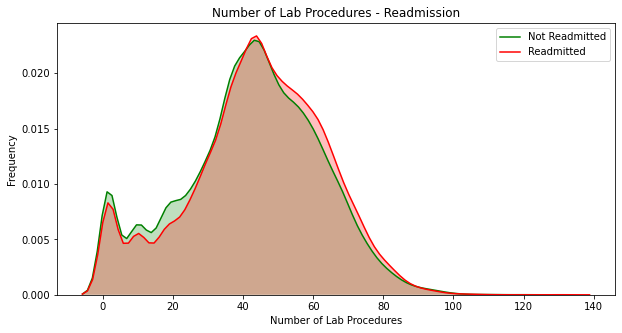

In [37]:
fig = plt.figure(figsize=(10,5))

ax = sns.kdeplot(df.loc[(df.readmitted == 'NO'), "num_lab_procedures"],
                 color = "g", shade = True,label = "Not Readmitted")

ax = sns.kdeplot(df.loc[(df.readmitted != 'NO'), "num_lab_procedures"],
                 color = "r", shade = True, label = "Readmitted")

ax.legend(loc="upper right")
ax.set_xlabel("Number of Lab Procedures")
ax.set_ylabel("Frequency")
ax.set_title("Number of Lab Procedures - Readmission")

plt.show()

## Feature Engineering

Number of outpatient visits, number of inpatient visits and  emergency room visits (in the year before the hospitalization) measures how much hospital services a person has used.

In [38]:
df['hospital_service_usage'] = df['number_inpatient'] + df['number_outpatient'] + df['number_emergency']

#### Number of medication changes

we are going to create a new feature in order to measure the change in the medication

In [39]:
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in drugs:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1) # here we care about changes in the drug so put 1 if 'Up' or 'Down'
df['numchange'] = 0
for col in drugs:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]
    
df['numchange'].value_counts() 

0    70142
1    24922
2     1271
3      106
4        5
Name: numchange, dtype: int64

Now we can check for the patients with more changes in their drugs

In [40]:
df[df.numchange == 4]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,hospital_service_usage,numchange
70821,203948982,42138342,Other,Male,75,1,5,7,5,70,...,No,No,No,No,No,Ch,Yes,NO,0,4
73369,216705336,84476547,Caucasian,Male,55,1,1,7,4,37,...,No,No,No,No,No,Ch,Yes,NO,0,4
76627,231426660,92919915,AfricanAmerican,Female,55,3,5,7,8,73,...,No,No,No,No,No,Ch,Yes,>30,1,4
76760,232085070,91760571,Caucasian,Female,85,2,6,7,6,58,...,No,No,No,No,No,Ch,Yes,>30,0,4
96599,377841854,146114393,Hispanic,Female,65,1,1,7,6,61,...,No,No,No,No,No,Ch,Yes,NO,0,4


## Enconding variables

In [41]:
df.change.unique(), df.gender.unique() ,df.diabetesMed.unique()

(array(['Ch', 'No'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['Yes', 'No'], dtype=object))

In [42]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)
# drugs is the same as before
for col in drugs: #here we care about having or not the drug
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

We also reduced both A1C test result and Glucose serum test result into categories of Normal, Abnormal and Not tested.

In [43]:
df.A1Cresult.unique(), df.max_glu_serum.unique()

(array(['None', '>7', '>8', 'Norm'], dtype=object),
 array(['None', '>300', 'Norm', '>200'], dtype=object))

In [44]:
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -99)
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)

In [45]:
df.shape

(96446, 47)

Some patients in the dataset had more than one encounter, we can't count them as independent encounters cause that is going to bias the result towards those who had several encounters.

We can considered the first and last encounter separately as possible representations of multiple encounters. So we are going to evaluate the balance of the data in order to see wich aproach is better


#### Readmissions vs No Readmissions using this approach

Since we are primarily interested in factors that lead to early readmission, we defined the readmission attribute (outcome) as having two values: “readmitted,” if the patient was readmitted within 30 days of discharge or “otherwise,” which covers both readmission after 30 days and no readmission at all.

In [46]:
#keeping the last encounter
duplicated_last_approach = df[df.duplicated(subset=['patient_nbr'], keep='last')]
len(duplicated_last_approach)

28866

In [47]:
last_encounter_readmission = duplicated_last_approach[duplicated_last_approach['readmitted'] == '<30']
len(last_encounter_readmission)

7725

In [48]:
percentage_of_readmission = len(last_encounter_readmission)/len(duplicated_last_approach)
print(f'keeping the last encounters we get {len(duplicated_last_approach)} records for which {round(percentage_of_readmission * 100)} % of patients has been readmitted')

keeping the last encounters we get 28866 records for which 27 % of patients has been readmitted


In [49]:
#keeping the first encounter
duplicated_first_approach = df[df.duplicated(subset=['patient_nbr'], keep='first')]
len(duplicated_first_approach)

28866

In [50]:
first_encounter_readmission = duplicated_first_approach[duplicated_first_approach['readmitted'] == '<30']
len(first_encounter_readmission)

4937

In [51]:
percentage_of_readmission = len(first_encounter_readmission)/len(duplicated_first_approach)
print(f'keeping the first encounters we get {len(duplicated_first_approach)} records for which {round(percentage_of_readmission * 100)} % of patients has been readmitted')

keeping the first encounters we get 28866 records for which 17 % of patients has been readmitted


Using the last encounters approach we end up with a less imbalanced data for readmissions (27/73 Readmissions vs No Readmissions) and so we are going to use last encounters of patients

In [52]:
# df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'last')
# df2.shape
df = df.drop_duplicates(subset= ['patient_nbr'], keep = 'last')
df.shape

(67580, 47)

<ipython-input-53-f8b82aaa1b66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['readmitted'] = df['readmitted'].replace('>30', 0)
<ipython-input-53-f8b82aaa1b66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['readmitted'] = df['readmitted'].replace('<30', 1)
<ipython-input-53-f8b82aaa1b66>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

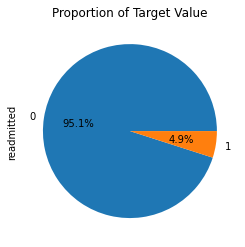

In [53]:
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

df.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

## Pre-Modeling Data Preprocessing

In [54]:
# convert data type of nominal features in dataframe to 'object' type
i = ['encounter_id', 'patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
          'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', \
          'age', 'A1Cresult', 'max_glu_serum']

df[i] = df[i].astype('object')

c:\users\silo\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [55]:
df.dtypes

encounter_id                object
patient_nbr                 object
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

In [56]:
#number of medication used
df['num_med'] = 0

for col in drugs:
    df['num_med'] = df['num_med'] + df[col]
df['num_med'].value_counts()

<ipython-input-56-4deb19d2eb0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_med'] = 0
<ipython-input-56-4deb19d2eb0e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_med'] = df['num_med'] + df[col]


1    30302
0    16322
2    14742
3     5253
4      914
5       44
6        3
Name: num_med, dtype: int64

In [57]:
# get list of only numeric features
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
num_col

['number_inpatient',
 'numchange',
 'number_diagnoses',
 'num_lab_procedures',
 'num_medications',
 'number_emergency',
 'hospital_service_usage',
 'num_procedures',
 'time_in_hospital',
 'number_outpatient']

In [58]:
# Removing skewnewss and kurtosis using log transformation if it is above a threshold value -  2

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = df[i].skew()
    skew_before.append(skewval)
    
    kurtval = df[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = df[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')
        
        if len(df[df[i] == 0])/len(df) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)
            
            kurtvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)
        
            kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
    else:
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [59]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,number_inpatient,3.565698,20.074345,1.001481,Yes,log1p,1.645893,2.019077,0.450604
1,numchange,1.569535,1.969646,0.478385,No,NA,1.569535,1.969646,0.478385
2,number_diagnoses,-0.727462,-0.522964,1.871410,No,NA,-0.727462,-0.522964,1.871410
3,num_lab_procedures,-0.230880,-0.266456,19.811533,No,NA,-0.230880,-0.266456,19.811533
4,num_medications,1.381942,3.589054,8.212125,No,NA,1.381942,3.589054,8.212125
5,number_emergency,21.710910,1074.217308,0.692307,Yes,log1p,3.926430,18.859096,0.268686
6,hospital_service_usage,5.388040,66.409949,1.884709,Yes,log1p,1.254378,0.890133,0.607281
7,num_procedures,1.254774,0.669737,1.731684,No,NA,1.254774,0.669737,1.731684
8,time_in_hospital,1.156949,0.913354,2.977258,No,NA,1.156949,0.913354,2.977258
9,number_outpatient,9.107214,158.220970,1.195114,Yes,log1p,2.899433,8.848428,0.411562


In [60]:
# perform log transformation.

for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])
        
        if statdataframe['log_type'][i] == 'log':
            df = df[df[colname] > 0]
            df[colname + "_log"] = np.log(df[colname])
            
        elif statdataframe['log_type'][i] == 'log1p':
            df = df[df[colname] >= 0]
            df[colname + "_log1p"] = np.log1p(df[colname])

In [61]:
#drop columns with no tranformation
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency','hospital_service_usage'], axis = 1)

In [62]:
len(df.columns)

48

In [63]:
# get list of only numeric features
numerics = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
numerics

['numchange',
 'number_inpatient_log1p',
 'number_emergency_log1p',
 'number_outpatient_log1p',
 'number_diagnoses',
 'num_medications',
 'num_procedures',
 'time_in_hospital',
 'hospital_service_usage_log1p',
 'num_lab_procedures']

<AxesSubplot:>

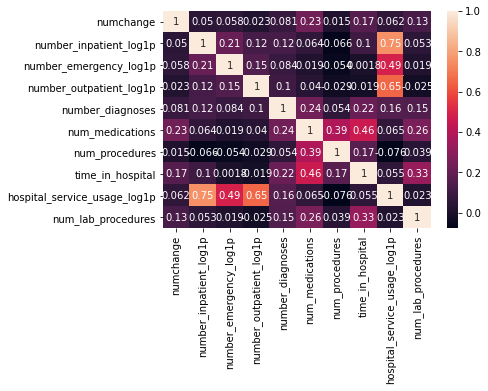

In [64]:
# covariance - uses spearman rank covariance coeff.
sns.heatmap(df[numerics].corr(), annot =  True)


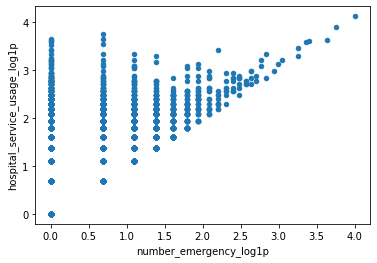

In [65]:
#bivariate analysis of related features

#number of emergency visit/hospital usage
var = 'number_emergency_log1p'
data = pd.concat([df['hospital_service_usage_log1p'], df[var]], axis=1)
data.plot.scatter(x=var, y='hospital_service_usage_log1p');

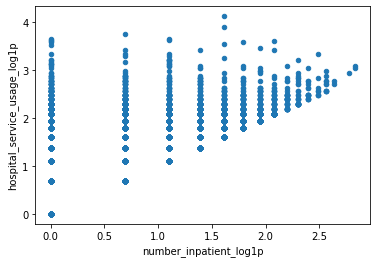

In [66]:
#number of inpatient visit/hospital usage
var = 'number_inpatient_log1p'
data = pd.concat([df['hospital_service_usage_log1p'], df[var]], axis=1)
data.plot.scatter(x=var, y='hospital_service_usage_log1p');

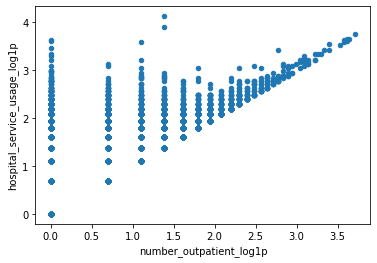

In [67]:
#number of outpatient visit/hospital usage
var = 'number_outpatient_log1p'
data = pd.concat([df['hospital_service_usage_log1p'], df[var]], axis=1)
data.plot.scatter(x=var, y='hospital_service_usage_log1p');

In [68]:
# show list of features that are categorical
df.encounter_id = df.encounter_id.astype('int64')
df.patient_nbr = df.patient_nbr.astype('int64')
df.diabetesMed = df.diabetesMed.astype('int64')
df.change = df.change.astype('int64')

# convert data type of nominal features in dataframe to 'object' type for aggregating
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide','pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide','insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone','metformin-rosiglitazone', 'metformin-pioglitazone','A1Cresult']
df[i] = df[i].astype('int64')

In [69]:
dfcopy = df.copy(deep = True)

In [70]:
df.shape

(67580, 48)

## Feature Scaling

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df[numerics])

In [72]:
df[numerics]

,numchange,number_inpatient_log1p,number_emergency_log1p,number_outpatient_log1p,number_diagnoses,num_medications,num_procedures,time_in_hospital,hospital_service_usage_log1p,num_lab_procedures
1,1,0.000000,0.0,0.000000,9,18,0,3,0.000000,59
2,0,0.693147,0.0,1.098612,6,13,5,2,1.386294,11
3,1,0.000000,0.0,0.000000,7,16,1,2,0.000000,44
4,0,0.000000,0.0,0.000000,5,8,0,1,0.000000,51
5,0,0.000000,0.0,0.000000,9,16,6,3,0.000000,31
...,...,...,...,...,...,...,...,...,...,...
101761,1,0.000000,0.0,0.000000,9,16,0,3,0.000000,51
101762,0,0.693147,0.0,0.000000,9,18,3,5,0.693147,33
101763,1,0.000000,0.0,0.693147,13,9,0,1,0.693147,53
101764,1,0.693147,0.0,0.000000,9,21,2,10,0.693147,45


In [73]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'numchange', 'num_med', 'number_inpatient_log1p',
       'number_emergency_log1p', 'hospital_service_usage_log1p',
       'number_outpatient_log1p'],
      dtype='object')

In [74]:
non_num_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                'max_glu_serum', 'A1Cresult' ]

In [75]:
# num_cols = list(set(list(df._get_numeric_data().columns))- {'readmitted', 'change'})
# len(num_cols)

### One Hot Encoder - variables with many categories

In [76]:
#how many categories each variable has
for col in df[non_num_cols]:
    print(f'{col}: {len(df[col].unique())} categories')

race: 5 categories
gender: 2 categories
admission_type_id: 8 categories
discharge_disposition_id: 25 categories
admission_source_id: 17 categories
max_glu_serum: 3 categories
A1Cresult: 3 categories


The features 'discharge_disposition_id' and 'admission_source_id' have lot of categories, if we use one hot encoding we end up with 40 new features.

In the winning solution of the KDD 2009 cup: Winning the KDD Cup Orange Challenge with Ensemble Selection the authors limit one hot encoding to the 10 most frequent labels only. This is equivalent to grouping all the other labels under a new category, that in this case will be dropped. Thus, the 10 new dummies variables indicate if one of the 10 most frequent labels is present(1) or not (0) for a particular observation

In [77]:
#lets find the top 10 most frequent categories for the variable discharge_disposition_id
df.discharge_disposition_id.value_counts().sort_values(ascending = False).head(10)

1     41539
3      9155
6      8347
18     2357
2      1412
22     1283
5       799
25      540
4       513
7       392
Name: discharge_disposition_id, dtype: int64

In [78]:
#lets make a list with the most frequent categories of the variable
top_10_dd = [ x for x in df.discharge_disposition_id.value_counts().sort_values(ascending=False).head(10).index]
top_10_dd

[1, 3, 6, 18, 2, 22, 5, 25, 4, 7]

In [79]:
# and now we make the 10 binary variables
for label in top_10_dd:
  df['discharge_disposition_id'+'_'+ str(label)]= np.where(df['discharge_disposition_id']==label,1,0)

In [80]:
df.shape

(67580, 58)

In [81]:
df = df.drop(columns= ['discharge_disposition_id'])

Same process for admission_source_id

In [82]:
top_10_as = [ x for x in df.admission_source_id.value_counts().sort_values(ascending=False).head(10).index]
top_10_as

[7, 1, 17, 4, 6, 2, 5, 20, 3, 9]

In [83]:
for label_ in top_10_dd:
  df['admission_source_id'+'_'+ str(label_)]= np.where(df['admission_source_id']==label_,1,0)

In [84]:
df = df.drop(columns= ['admission_source_id'])

In [85]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'numchange', 'num_med', 'number_inpatient_log1p',
       'number_emergency_log1p', 'hospital_service_usage_log1p',
       'number_outpatient_log1p', 'discharge_disposition_id_1',
       'discharge_disposition_id_3', 'discharge_disposition_id_6',
       'discharge_disposition_id_18', 'disc

In [86]:
df = df.drop(columns= ['encounter_id','patient_nbr','diag_1','diag_2','diag_3'])

In [87]:
df.A1Cresult.unique()

array([-99,   1,   0], dtype=int64)

In [88]:
#showing some columns
df.iloc[:10,37:47]

,number_inpatient_log1p,number_emergency_log1p,hospital_service_usage_log1p,number_outpatient_log1p,discharge_disposition_id_1,discharge_disposition_id_3,discharge_disposition_id_6,discharge_disposition_id_18,discharge_disposition_id_2,discharge_disposition_id_22
1,0.000000,0.0,0.000000,0.000000,1,0,0,0,0,0
2,0.693147,0.0,1.386294,1.098612,1,0,0,0,0,0
3,0.000000,0.0,0.000000,0.000000,1,0,0,0,0,0
4,0.000000,0.0,0.000000,0.000000,1,0,0,0,0,0
5,0.000000,0.0,0.000000,0.000000,1,0,0,0,0,0
6,0.000000,0.0,0.000000,0.000000,1,0,0,0,0,0
7,0.000000,0.0,0.000000,0.000000,1,0,0,0,0,0
8,0.000000,0.0,0.000000,0.000000,1,0,0,0,0,0
9,0.000000,0.0,0.000000,0.000000,0,1,0,0,0,0
10,0.000000,0.0,0.000000,0.000000,1,0,0,0,0,0


In [89]:
df = pd.get_dummies(df,columns=['race', 'admission_type_id',
                                                   'max_glu_serum', 'A1Cresult' ],drop_first = True)

In [90]:
df.shape

(67580, 72)

In [91]:
df.readmitted.unique()

array([0, 1], dtype=int64)

In [92]:
X = df.loc[:, ~df.columns.isin(['readmitted'])]
y = df['readmitted']

In [93]:
X.shape

(67580, 71)

In [94]:
df['readmitted'].value_counts()

0    64239
1     3341
Name: readmitted, dtype: int64

In [95]:
X.columns

Index(['gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_diagnoses', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'numchange',
       'num_med', 'number_inpatient_log1p', 'number_emergency_log1p',
       'hospital_service_usage_log1p', 'number_outpatient_log1p',
       'discharge_disposition_id_1', 'discharge_disposition_id_3',
       'discharge_disposition_id_6', 'discharge_disposition_id_18',
       'discharge_disposition_id_2', 'discharge_disposition_id_22',
       'discharge_disposition_id_5', 'discharge_disposition_id_25',
       'discharge_dispos

## Logistic Regression

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l2',solver='lbfgs', max_iter=1000) 
logit.fit(X_train, y_train)

c:\users\silo\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [97]:
logit_pred = logit.predict(X_test)

In [98]:
logit.score(X_test,y_test)

0.9491713524711453

In [99]:
from sklearn.metrics import confusion_matrix
cmtx = pd.DataFrame(
    confusion_matrix(y_test, logit_pred), 
    index=['actual:0', 'actual:1'], 
    columns=['pred:0', 'pred:1']
)
print(cmtx)


          pred:0  pred:1
actual:0   12829       0
actual:1     687       0


In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

Accuracy is 0.95
Precision is 0.00
Recall is 0.00


c:\users\silo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Since our target variable is having class imbalance problem, So will use SMOTE technique to resolve it

In [101]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print(f'Original dataset shape {Counter(y_train)}')
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_resample(X_train, y_train)
print(f'New dataset shape {Counter(train_output_new)}')

Original dataset shape Counter({0: 51410, 1: 2654})
New dataset shape Counter({0: 51410, 1: 51410})


In [102]:
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l2')
logit.fit(X_train, y_train)

c:\users\silo\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
logit_pred = logit.predict(X_test)

In [104]:
cmtx = pd.DataFrame(
    confusion_matrix(y_test, logit_pred), 
    index=['actual:0', 'actual:1'], 
    columns=['pred:0', 'pred:1']
)
print(cmtx)

          pred:0  pred:1
actual:0    9269    1027
actual:1    1507    8761


In [105]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

accuracy_logit = accuracy_score(y_test, logit_pred)
precision_logit = precision_score(y_test, logit_pred)
recall_logit = recall_score(y_test, logit_pred)

Accuracy is 0.88
Precision is 0.90
Recall is 0.85


In [106]:
df._get_numeric_data()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,...,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,max_glu_serum_0,max_glu_serum_1,A1Cresult_0,A1Cresult_1
1,3,59,0,18,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,11,5,13,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,44,1,16,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,51,0,8,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,31,6,16,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,3,51,0,16,9,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
101762,5,33,3,18,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101763,1,53,0,9,13,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101764,10,45,2,21,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Decision Tree

In [107]:
feature_set_no_int = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p', 
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 
                 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
                 'tolazamide', 'insulin', 'glyburide-metformin',
                 'AfricanAmerican', 'Asian', 'Caucasian', 
                 'Hispanic', 'Other', 'gender_1', 
                 'admission_type_id_3', 'admission_type_id_5', 
                 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 
                 'admission_source_id_4', 'admission_source_id_7', 
                 'admission_source_id_9', 'max_glu_serum_0', 
                 'max_glu_serum_1', 'A1Cresult_0', 'A1Cresult_1', 
                 ]

In [108]:
print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 64239, 1: 3341})
New dataset shape Counter({0: 64239, 1: 64239})


In [109]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=10)

In [110]:
dtree_pred = dtree.predict(X_test)


In [111]:
cmtx = pd.DataFrame(
    confusion_matrix(y_test, dtree_pred), 
    index=['actual:0', 'actual:1'], 
    columns=['pred:0', 'pred:1']
)
print(cmtx)

          pred:0  pred:1
actual:0   12338     595
actual:1     671   12092


In [112]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))


Accuracy is 0.95
Precision is 0.95
Recall is 0.95


                         Feature  Importance
5                num_medications    0.027406
39   discharge_disposition_id_18    0.027683
37    discharge_disposition_id_3    0.029985
38    discharge_disposition_id_6    0.035776
3             num_lab_procedures    0.040362
31                       num_med    0.043593
36    discharge_disposition_id_1    0.049921
0                         gender    0.057506
34  hospital_service_usage_log1p    0.061569
32        number_inpatient_log1p    0.401480


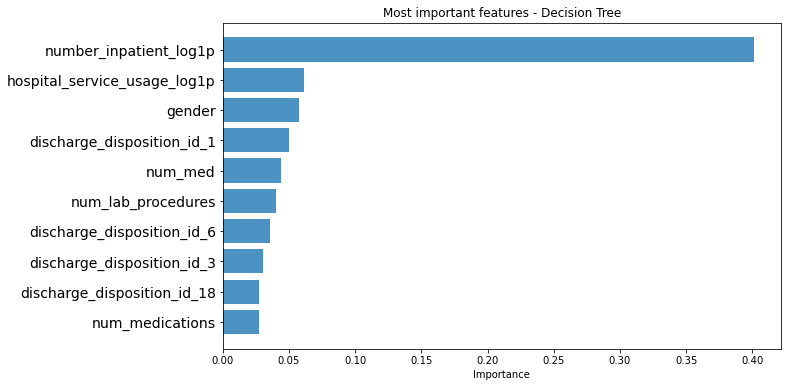

In [113]:
# features with most impact
feature_names = X_train.columns
feature_imports = dtree.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

## Random Forest

In [114]:
print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 64239, 1: 3341})
New dataset shape Counter({0: 64239, 1: 64239})


In [115]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=10)

In [116]:
rm_prd = rm.predict(X_test)

In [117]:
cmtx = pd.DataFrame(
    confusion_matrix(y_test, rm_prd), 
    index=['actual:0', 'actual:1'], 
    columns=['pred:0', 'pred:1']
)
print(cmtx)

          pred:0  pred:1
actual:0   12849      84
actual:1     735   12028


In [118]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, rm_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, rm_prd)))


Accuracy is 0.97
Precision is 0.99
Recall is 0.94


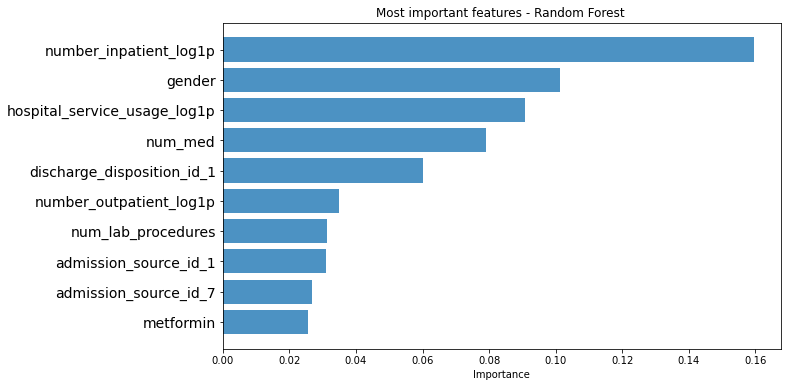

In [119]:
# features with most impact
feature_names = X_train.columns
feature_imports = rm.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()

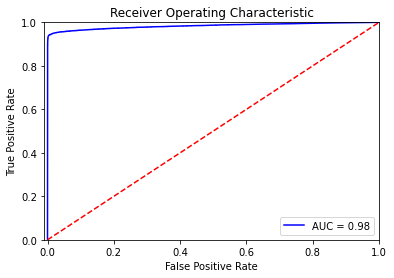

In [120]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = rm.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# plotting the curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = f'AUC = {roc_auc:.2f}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# XGBoost

Before proceding we need to change the object type columns

In [121]:
object_columns = X.loc[:, df.dtypes == object].columns
object_columns

Index(['gender', 'age', 'num_med'], dtype='object')

In [122]:
for col in object_columns:
    print(col)
    X[col] = pd.to_numeric(X[col])

gender
age
num_med


<ipython-input-122-10d7f85ccf9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.to_numeric(X[col])


In [123]:
import xgboost as xgb
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)


New dataset shape Counter({0: 64239, 1: 64239})


In [124]:
xgb_model = xgb.XGBClassifier(max_depth=10,n_estimators=100)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [125]:
xgb_pred=xgb_model.predict(X_test)
xgb_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [126]:
cmtx = pd.DataFrame(
    confusion_matrix(y_test, xgb_pred), 
    index=['actual:0', 'actual:1'], 
    columns=['pred:0', 'pred:1']
)
print(cmtx)

          pred:0  pred:1
actual:0   12754     179
actual:1     717   12046


In [127]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, xgb_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, xgb_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, xgb_pred)))

Accuracy is 0.97
Precision is 0.99
Recall is 0.94


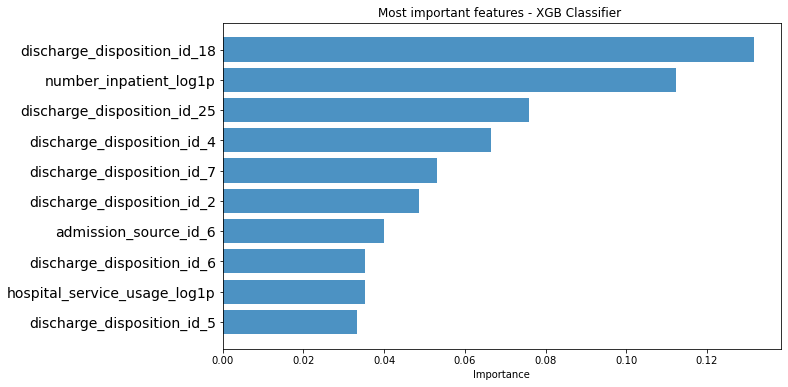

In [128]:
# features with most impact
feature_names = X_train.columns
feature_imports = xgb_model.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - XGB Classifier ')
plt.show()

# Artificial Neural Network

In [152]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Model
model = Sequential()
model.add(Dense(4, input_dim=71, activation='relu', name = 'input_layer'))
model.add(Dense(10, activation='relu', name = 'hidden_layer'))
model.add(Dense(1, activation='sigmoid', name = 'output_layer'))

# Compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit
model.fit(X_train, y_train, epochs=500, batch_size=25)

# Evaluation
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


Epoch 1/500
4112/4112 [==============================] - 4s 790us/step - loss: 0.4639 - accuracy: 0.7669
Epoch 2/500
4112/4112 [==============================] - 3s 789us/step - loss: 0.2539 - accuracy: 0.9017
Epoch 3/500
4112/4112 [==============================] - 3s 813us/step - loss: 0.2444 - accuracy: 0.9068
Epoch 4/500
4112/4112 [==============================] - 3s 779us/step - loss: 0.2412 - accuracy: 0.9077
Epoch 5/500
4112/4112 [==============================] - 3s 780us/step - loss: 0.2401 - accuracy: 0.9074
Epoch 6/500
4112/4112 [==============================] - 3s 784us/step - loss: 0.2391 - accuracy: 0.9085
Epoch 7/500
4112/4112 [==============================] - 3s 795us/step - loss: 0.2386 - accuracy: 0.9080
Epoch 8/500
4112/4112 [==============================] - 3s 800us/step - loss: 0.2375 - accuracy: 0.9086
Epoch 9/500
4112/4112 [==============================] - 3s 824us/step - loss: 0.2375 - accuracy: 0.9080
Epoch 10/500
4112/4112 [==============================]

4112/4112 [==============================] - 3s 797us/step - loss: 0.2251 - accuracy: 0.9098
Epoch 79/500
4112/4112 [==============================] - 3s 792us/step - loss: 0.2249 - accuracy: 0.9103
Epoch 80/500
4112/4112 [==============================] - 3s 785us/step - loss: 0.2248 - accuracy: 0.9102
Epoch 81/500
4112/4112 [==============================] - 3s 784us/step - loss: 0.2246 - accuracy: 0.9097
Epoch 82/500
4112/4112 [==============================] - 3s 777us/step - loss: 0.2250 - accuracy: 0.9096
Epoch 83/500
4112/4112 [==============================] - 3s 777us/step - loss: 0.2246 - accuracy: 0.9094
Epoch 84/500
4112/4112 [==============================] - 3s 827us/step - loss: 0.2246 - accuracy: 0.9096
Epoch 85/500
4112/4112 [==============================] - 3s 777us/step - loss: 0.2245 - accuracy: 0.9098
Epoch 86/500
4112/4112 [==============================] - 3s 810us/step - loss: 0.2247 - accuracy: 0.9102
Epoch 87/500
4112/4112 [==============================] - 3

4112/4112 [==============================] - 3s 780us/step - loss: 0.2229 - accuracy: 0.9102
Epoch 155/500
4112/4112 [==============================] - 3s 782us/step - loss: 0.2229 - accuracy: 0.9102
Epoch 156/500
4112/4112 [==============================] - 3s 780us/step - loss: 0.2235 - accuracy: 0.9098
Epoch 157/500
4112/4112 [==============================] - 3s 779us/step - loss: 0.2232 - accuracy: 0.9100
Epoch 158/500
4112/4112 [==============================] - 3s 801us/step - loss: 0.2231 - accuracy: 0.9099
Epoch 159/500
4112/4112 [==============================] - 3s 780us/step - loss: 0.2232 - accuracy: 0.9100
Epoch 160/500
4112/4112 [==============================] - 3s 779us/step - loss: 0.2230 - accuracy: 0.9102
Epoch 161/500
4112/4112 [==============================] - 3s 780us/step - loss: 0.2232 - accuracy: 0.9098
Epoch 162/500
4112/4112 [==============================] - 3s 782us/step - loss: 0.2231 - accuracy: 0.9102
Epoch 163/500
4112/4112 [==========================

4112/4112 [==============================] - 3s 775us/step - loss: 0.2221 - accuracy: 0.9108
Epoch 231/500
4112/4112 [==============================] - 3s 780us/step - loss: 0.2222 - accuracy: 0.9103
Epoch 232/500
4112/4112 [==============================] - 3s 771us/step - loss: 0.2225 - accuracy: 0.9105
Epoch 233/500
4112/4112 [==============================] - 3s 787us/step - loss: 0.2221 - accuracy: 0.9103
Epoch 234/500
4112/4112 [==============================] - 3s 770us/step - loss: 0.2221 - accuracy: 0.9104
Epoch 235/500
4112/4112 [==============================] - 3s 767us/step - loss: 0.2222 - accuracy: 0.9104
Epoch 236/500
4112/4112 [==============================] - 3s 781us/step - loss: 0.2222 - accuracy: 0.9102
Epoch 237/500
4112/4112 [==============================] - 3s 780us/step - loss: 0.2223 - accuracy: 0.9108
Epoch 238/500
4112/4112 [==============================] - 3s 770us/step - loss: 0.2222 - accuracy: 0.9107
Epoch 239/500
4112/4112 [==========================

4112/4112 [==============================] - 3s 767us/step - loss: 0.2215 - accuracy: 0.9117
Epoch 307/500
4112/4112 [==============================] - 3s 768us/step - loss: 0.2222 - accuracy: 0.9110
Epoch 308/500
4112/4112 [==============================] - 3s 771us/step - loss: 0.2220 - accuracy: 0.9113
Epoch 309/500
4112/4112 [==============================] - 3s 766us/step - loss: 0.2219 - accuracy: 0.9104
Epoch 310/500
4112/4112 [==============================] - 3s 777us/step - loss: 0.2220 - accuracy: 0.9103
Epoch 311/500
4112/4112 [==============================] - 3s 777us/step - loss: 0.2217 - accuracy: 0.9111
Epoch 312/500
4112/4112 [==============================] - 3s 772us/step - loss: 0.2220 - accuracy: 0.9109
Epoch 313/500
4112/4112 [==============================] - 3s 770us/step - loss: 0.2218 - accuracy: 0.9108
Epoch 314/500
4112/4112 [==============================] - 3s 768us/step - loss: 0.2220 - accuracy: 0.9107
Epoch 315/500
4112/4112 [==========================

4112/4112 [==============================] - 3s 776us/step - loss: 0.2217 - accuracy: 0.9106
Epoch 383/500
4112/4112 [==============================] - 3s 760us/step - loss: 0.2218 - accuracy: 0.9110
Epoch 384/500
4112/4112 [==============================] - 3s 780us/step - loss: 0.2215 - accuracy: 0.9109
Epoch 385/500
4112/4112 [==============================] - 3s 785us/step - loss: 0.2212 - accuracy: 0.9121
Epoch 386/500
4112/4112 [==============================] - 3s 781us/step - loss: 0.2214 - accuracy: 0.9113
Epoch 387/500
4112/4112 [==============================] - 3s 784us/step - loss: 0.2216 - accuracy: 0.9109
Epoch 388/500
4112/4112 [==============================] - 3s 777us/step - loss: 0.2214 - accuracy: 0.9113
Epoch 389/500
4112/4112 [==============================] - 3s 779us/step - loss: 0.2213 - accuracy: 0.9114
Epoch 390/500
4112/4112 [==============================] - 3s 776us/step - loss: 0.2217 - accuracy: 0.9110
Epoch 391/500
4112/4112 [==========================

4112/4112 [==============================] - 3s 769us/step - loss: 0.2215 - accuracy: 0.9112
Epoch 459/500
4112/4112 [==============================] - 3s 764us/step - loss: 0.2213 - accuracy: 0.9112
Epoch 460/500
4112/4112 [==============================] - 3s 777us/step - loss: 0.2212 - accuracy: 0.9114
Epoch 461/500
4112/4112 [==============================] - 3s 766us/step - loss: 0.2210 - accuracy: 0.9119
Epoch 462/500
4112/4112 [==============================] - 3s 769us/step - loss: 0.2214 - accuracy: 0.9115
Epoch 463/500
4112/4112 [==============================] - 3s 774us/step - loss: 0.2212 - accuracy: 0.9110
Epoch 464/500
4112/4112 [==============================] - 3s 768us/step - loss: 0.2212 - accuracy: 0.9111
Epoch 465/500
4112/4112 [==============================] - 3s 775us/step - loss: 0.2211 - accuracy: 0.9112
Epoch 466/500
4112/4112 [==============================] - 3s 782us/step - loss: 0.2212 - accuracy: 0.9113
Epoch 467/500
4112/4112 [==========================

In [158]:
nn_pred = model.predict(X_test)

In [159]:
rounded = [round(z[0]) for z in predictions]
nn_pred = rounded

In [160]:
cmtx = pd.DataFrame(
    confusion_matrix(y_test, nn_pred), 
    index=['actual:0', 'actual:1'], 
    columns=['pred:0', 'pred:1']
)
print(cmtx)

          pred:0  pred:1
actual:0    3235    9698
actual:1     133   12630


In [161]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, nn_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, nn_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, nn_pred)))


Accuracy is 0.62
Precision is 0.57
Recall is 0.99
